In [15]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras import datasets, layers, models

In [2]:
tf.config.experimental.list_physical_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]

In [3]:
tf.test.is_built_with_cuda()

False

In [4]:
(X_train, y_train),(X_test, y_test) = tf.keras.datasets.cifar10.load_data()

In [5]:
X_train[0][0]

array([[ 59,  62,  63],
       [ 43,  46,  45],
       [ 50,  48,  43],
       [ 68,  54,  42],
       [ 98,  73,  52],
       [119,  91,  63],
       [139, 107,  75],
       [145, 110,  80],
       [149, 117,  89],
       [149, 120,  93],
       [131, 103,  77],
       [125,  99,  76],
       [142, 115,  91],
       [144, 112,  86],
       [137, 105,  79],
       [129,  97,  71],
       [137, 106,  79],
       [134, 106,  76],
       [124,  97,  64],
       [139, 113,  78],
       [139, 112,  75],
       [133, 105,  69],
       [136, 105,  74],
       [139, 108,  77],
       [152, 120,  89],
       [163, 131, 100],
       [168, 136, 108],
       [159, 129, 102],
       [158, 130, 104],
       [158, 132, 108],
       [152, 125, 102],
       [148, 124, 103]], dtype=uint8)

array([1], dtype=uint8)

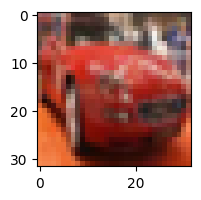

In [6]:
plt.figure(figsize=(3,2))
plt.imshow(X_train[5])
y_train[5]

In [7]:
classes = ["airplane", "automobile", "bird", "cat", "deer","dog","frog","horse","ship","truck"]

In [8]:
classes[y_train[9][0]]

'cat'

3

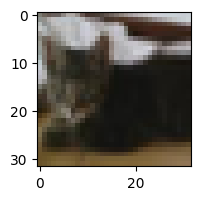

In [9]:

plt.figure(figsize=(3,2))
plt.imshow(X_train[9])
y_train[9][0]

In [10]:
y_train.shape

(50000, 1)

In [11]:
y_train[0:50]

array([[6],
       [9],
       [9],
       [4],
       [1],
       [1],
       [2],
       [7],
       [8],
       [3],
       [4],
       [7],
       [7],
       [2],
       [9],
       [9],
       [9],
       [3],
       [2],
       [6],
       [4],
       [3],
       [6],
       [6],
       [2],
       [6],
       [3],
       [5],
       [4],
       [0],
       [0],
       [9],
       [1],
       [3],
       [4],
       [0],
       [3],
       [7],
       [3],
       [3],
       [5],
       [2],
       [2],
       [7],
       [1],
       [1],
       [1],
       [2],
       [2],
       [0]], dtype=uint8)

In [12]:
X_train_scaled = X_train/255
X_test_scaled = X_test/255

In [13]:
X_test_scaled[0][0]

array([[0.61960784, 0.43921569, 0.19215686],
       [0.62352941, 0.43529412, 0.18431373],
       [0.64705882, 0.45490196, 0.2       ],
       [0.65098039, 0.4627451 , 0.20784314],
       [0.62745098, 0.43921569, 0.18039216],
       [0.61176471, 0.42745098, 0.16078431],
       [0.63529412, 0.45098039, 0.18431373],
       [0.62352941, 0.44313725, 0.17647059],
       [0.61960784, 0.43529412, 0.17254902],
       [0.62352941, 0.44313725, 0.16078431],
       [0.63137255, 0.45490196, 0.16078431],
       [0.62745098, 0.43529412, 0.20392157],
       [0.63137255, 0.43529412, 0.19215686],
       [0.65098039, 0.45882353, 0.16078431],
       [0.6627451 , 0.45882353, 0.17647059],
       [0.66666667, 0.46666667, 0.17254902],
       [0.65490196, 0.45882353, 0.15686275],
       [0.63529412, 0.44313725, 0.14901961],
       [0.62745098, 0.43529412, 0.15294118],
       [0.62745098, 0.43921569, 0.16862745],
       [0.61176471, 0.42745098, 0.17254902],
       [0.58431373, 0.41960784, 0.17647059],
       [0.

In [14]:

y_train_cat = keras.utils.to_categorical(
    y_train, num_classes = 10
)
y_train_cat[:9]

array([[0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.]])

In [16]:
ann = models.Sequential([
        layers.Flatten(input_shape=(32,32,3)),
        layers.Dense(3000, activation='relu'),
        layers.Dense(1000, activation='relu'),
        layers.Dense(10, activation='softmax')    
    ])

ann.compile(optimizer='SGD',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

ann.fit(X_train, y_train, epochs=5)


c:\Users\Dell\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 60s 38ms/step - accuracy: 0.0992 - loss: nan
Epoch 2/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 58s 37ms/step - accuracy: 0.1006 - loss: nan
Epoch 3/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 66s 42ms/step - accuracy: 0.0981 - loss: nan
Epoch 4/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 65s 41ms/step - accuracy: 0.1005 - loss: nan
Epoch 5/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 71s 34ms/step - accuracy: 0.1020 - loss: nan


In [18]:
ann.evaluate(X_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.1001 - loss: nan


[nan, 0.10000000149011612]

In [ ]:
from sklearn.metrics import confusion_matrix , classification_report
import numpy as np
y_pred = ann.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classification Report: \n", classification_report(y_test, y_pred_classes))

In [17]:
np.argmax(45) #o find the index of the maximum value

0

In [23]:
cnn  = models.Sequential([
    #cnn
    layers.Conv2D(filters=32, kernel_size = (3,3), activation= "relu", input_shape = (32,32,3)),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(filters=64, kernel_size = (3,3), activation= "relu"),
    layers.MaxPooling2D((2,2)),

    #Dense
    layers.Flatten(input_shape=(32,32,3)),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

c:\Users\Dell\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
c:\Users\Dell\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [26]:
cnn.compile(
    optimizer = "adam",
    loss = "sparse_categorical_crossentropy",
    metrics = ["accuracy"]
)

In [27]:
cnn.fit(X_train, y_train, epochs= 5)

Epoch 1/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.2674 - loss: 3.5072
Epoch 2/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.5289 - loss: 1.3173
Epoch 3/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.5999 - loss: 1.1340
Epoch 4/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.6410 - loss: 1.0315
Epoch 5/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.6747 - loss: 0.9447


In [28]:
cnn.evaluate(X_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6208 - loss: 1.1096


[1.1166654825210571, 0.6237000226974487]

9

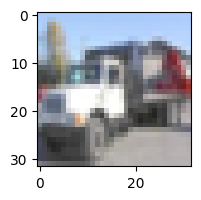

In [31]:
plt.figure(figsize=(3,2))
plt.imshow(X_test[45])
y_test[45][0]

In [38]:
y_pred_cnn = cnn.predict(X_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


In [37]:
np.argmax([4,7,3,4,2])

1

In [41]:
y_classes = [np.argmax(element) for element in y_pred_cnn]
print(y_classes[:30])

[3, 8, 9, 0, 6, 6, 1, 6, 4, 1, 4, 9, 3, 7, 9, 8, 5, 7, 8, 6, 4, 2, 2, 9, 4, 4, 4, 0, 9, 6]


In [44]:
y_test[:30].reshape(-1)

array([3, 8, 8, 0, 6, 6, 1, 6, 3, 1, 0, 9, 5, 7, 9, 8, 5, 7, 8, 6, 7, 0,
       4, 9, 5, 2, 4, 0, 9, 6], dtype=uint8)

In [45]:
classes[y_classes[45]]

'truck'

In [ ]:
plt.figure(figsize=(3,2))
plt.imshow(X_test[45])
y_test[45][0]

In [46]:
def predict_image_of(i):
    plt.figure(figsize=(3,2))
    plt.imshow(X_test[i])
    y_test[i][0]

    print("It is a ", classes[y_classes[i]] )


It is a  deer


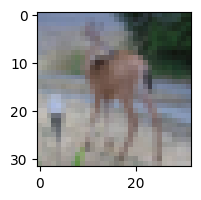

In [49]:
predict_image_of(100)